In [183]:
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
import sklearn.datasets as datasets
from sklearn.metrics import pairwise_distances

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
sns.set_context('poster')

import numpy as np

### Dimension Reduction Analysis

#### Goal

Effectively assess dimension reduction quality, and make it easy for others to do so as well. 

The desired punch line: here are the best ways to assess quality of your dimension reduction based on what you want your dimension reduction to preserve (paper), and here's how to easily check yourself on your own data (codebase). This should all come in a single handy framework with an easy to use API. 

#### Tasks

* Review and reproduce results existing quality measures. Create a cohesive easy to use interface along the way for comparing high vs. low space using whatever quality measure you'd like. 
    * ***Datasets:***
        * Synthetic
        * Natural (aka. real world)
            * MNIST
            * F-MNIST
            * COIL-20
    * ***Dimension Reduction Techniques:*** Preference to techniques that are implemented in sklearn and other standard python libraries or that are otherwise widely used.
        * PCA
        * MDS
        * Isomap
        * t-SNE
        * autoencoder
        * UMAP
        * Maybe others: (try them and then see if they add anything to the overall review)
    * ***Quality measures:***
        * Stress
        * Trustworthiness
        * Continuity
        * Generalization errors of 1-NN classifiers?
        * Quality score from coranking matrix
* Include visualization options (when reducing to 2/3 dimensional space)   
* Do the same analysis adding our local neighbourhood scores
* Make
        

#### References

* [***MPH2009***](https://www.tilburguniversity.edu/upload/59afb3b8-21a5-4c78-8eb3-6510597382db_TR2009005.pdf): 2009 review of 12 dimension reduction techniques on 10 datasets (5 synthetic, 5 natural) using trustworthiness, continuity, and generalization errors of 1-NN classifiers. Techniques used were  
    * Kernel PCA, 
    * Isomap
    * Maximum Variance Unfolding
    * diffusion maps
    * Locally Linear Embedding
    * Laplacian Eigenmaps
    * Hessian LLE
    * Local Tangent Space Analysis
    * Sammon mapping
    * multilayer autoencoders
    * Locally Linear Coordination
    * manifold charting.
* [***S2015***](http://journals.sagepub.com/doi/pdf/10.1177/1473871613504102): 2015 comparison  of DR techniques on financial data using metric MDS, Sammon’s mapping, and the SOM. "Rather than being the most recent methods, the rationale for comparing these methods is to capture the suitability of well-known dimension reduction methods with inherently different aims: global and local distance preservation and topology preservation. For DDR, we test serial and parallel combinations of the projections with three data reduction or compression methods: vector quantization (VQ),16 k-means clustering,17 and Ward’s18 hierarchical clustering."
* [***LOV2015***](https://www.sciencedirect.com/science/article/pii/S0925231215003641) Use of the follow on from the quality assessment from the co-ranking metric with an algorithm that is better via that score.
* [***LV2008***](http://proceedings.mlr.press/v4/lee08a/lee08a.pdf): Trustworthiness, continuity and the coranking matrix.

#### Bibtex

    @article{MPH2009,
      title={Dimensionality reduction: a comparative review},
      author={Van Der Maaten, Laurens and Postma, Eric and Van den Herik, Jaap},
      journal={J Mach Learn Res},
      volume={10},
      pages={66--71},
      year={2009}
    } 
    
    @article{S2015,
      title={Data and dimension reduction for visual financial performance analysis},
      author={Sarlin, Peter},
      journal={Information Visualization},
      volume={14},
      number={2},
      pages={148--167},
      year={2015},
      publisher={Sage Publications Sage UK: London, England}
    }
    
    @article{LOV2015,
      title={Multi-scale similarities in stochastic neighbour embedding: Reducing dimensionality while preserving both local and global structure},
      author={Lee, John A and Peluffo-Ord{\'o}{\~n}ez, Diego H and Verleysen, Michel},
      journal={Neurocomputing},
      volume={169},
      pages={246--261},
      year={2015},
      publisher={Elsevier}
    }
    
    @inproceedings{LV2008,
      title={Quality assessment of nonlinear dimensionality reduction based on K-ary neighborhoods},
      author={Lee, John and Verleysen, Michel},
      booktitle={New Challenges for Feature Selection in Data Mining and Knowledge Discovery},
      pages={21--35},
      year={2008}
    }

### Use PCA on MNIST to get high/low data for first example

In [2]:
digits = datasets.load_digits()

In [3]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [4]:
digits.data.shape

(1797, 64)

In [5]:
len(digits.target)

1797

In [6]:
high_data = digits.data

In [7]:
high_labels = digits.target

In [8]:
high_data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [9]:
pca = PCA(n_components=2, svd_solver='arpack')

In [10]:
low_data = pca.fit_transform(high_data)

In [11]:
low_labels = high_labels

In [194]:
def two_dim_label_viz(data, labels, cmap="Blues", s=10, **kwargs):
    """
    Plot data using labels as the color scheme.
    
    Parameters
    ----------
    data: 2d np array
    labels: labels
    any other plt.scatter options
    """
    plt.scatter(data[:,0], data[:,1], c=labels, cmap=cmap, s=s, **kwargs)
    plt.colorbar();

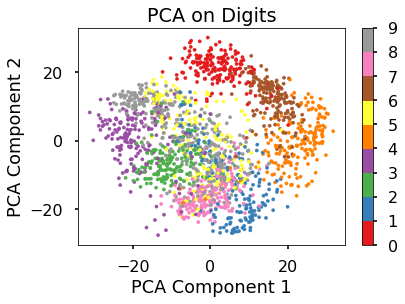

In [195]:
two_dim_label_viz(low_data, low_labels, cmap="Set1", s=10)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA on Digits");

### Quality score using stress

Metric MDS

$$ Stress_{D}(x_{1},x_{2},...,x_{N})={\Biggl (}\sum _{i\neq j=1,...,N}{\bigl (}d_{ij}-\|x_{i}-x_{j}\|{\bigr )}^{2}{\Biggr )}^{1/2}$$

In [14]:
high_distances = pairwise_distances(high_data, metric='euclidean')

In [15]:
low_distances = pairwise_distances(low_data, metric='euclidean')

In [16]:
difference_distances = high_distances-low_distances
s_difference_distances = difference_distances**2
stress = np.sqrt(np.sum(s_difference_distances))

Relative local contributions could be computed via row sums of the differences between the distances...or the sqrt of the row sums of the squared difference of the distances.

In [21]:
def pairwise_distance_difference(high_data, low_data, metric='euclidean'):
    high_distances = pairwise_distances(high_data, metric=metric)
    low_distances = pairwise_distances(low_data, metric=metric)
    difference_distances = high_distances-low_distances
    return difference_distances

In [252]:
def point_stress(difference_distances, metric='euclidean'):
    s_difference_distances = difference_distances**2
    point_stress = np.sum(s_difference_distances, axis=1)
    return point_stress

In [23]:
def stress(difference_distances, metric='euclidean'):
    s_difference_distances = difference_distances**2
    stress = np.sqrt(np.sum(s_difference_distances))
    return stress

In [260]:
pca_diff_distances = pairwise_distance_difference(high_data, low_data)
pca_point_stress = point_stress(pca_diff_distances)
pca_stress = stress(pca_diff_distances)

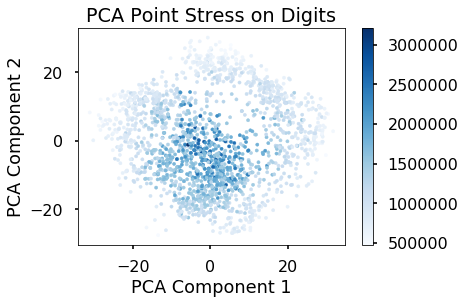

In [256]:
two_dim_label_viz(low_data, pca_point_stress, s=10)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Point Stress on Digits");

## metric MDS and digits

If I did this correctly, the above stress function should work the same as MDS.

In [197]:
mds = MDS(n_components=2, metric=True)

This usually takes...2 mins...

In [198]:
%%time
mds_low_data = mds.fit_transform(high_data)

CPU times: user 3min 1s, sys: 18.5 s, total: 3min 20s
Wall time: 1min 55s


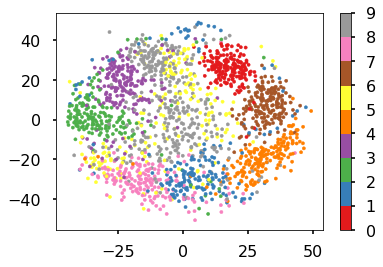

In [199]:
two_dim_label_viz(mds_low_data, low_labels, cmap="Set1", s=10)

In [79]:
mds.stress_

419286771.69738901

In [81]:
mds_diff_distances = pairwise_distance_difference(high_data, mds_low_data)

In [82]:
(stress(mds_diff_distances))**2/2

419282993.09653044

In [83]:
np.sqrt(mds.stress_*2)

28958.134321720005

In [84]:
stress(mds_diff_distances)

28958.003836470856

hmmm...off by a multiple of 2...where would that come from?

In [267]:
mds_stress = stress(mds_diff_distances)
mds_point_stress = point_stress(mds_diff_distances)

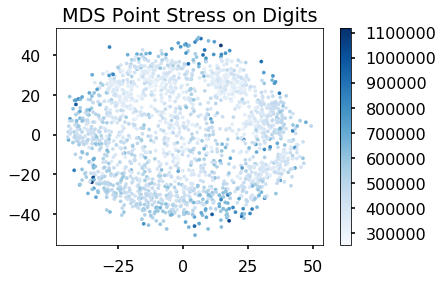

In [254]:
two_dim_label_viz(mds_low_data, mds_point_stress, s=10)
plt.title("MDS Point Stress on Digits");

### Classical MDS
(Optimal solution is given by PCA)

$$\textstyle Strain_{D}(x_{1},x_{2},...,x_{N})={\Biggl (}{\frac {\sum _{i,j}{\bigl (}b_{ij}-\langle x_{i},x_{j}\rangle {\bigr )}^{2}}{\sum _{i,j}b_{ij}^{2}}}{\Biggr )}^{1/2}$$

where $B = -\frac{1}{2} J D^{(2)}J$ and $J = I_{N}-{\tfrac  {1}{N}}{\mathbf  {1}}{\mathbf  {1}}^{\top }$ where $\mathbf  {1}$ is the $N$-dimensional vector of 1's. 

In [89]:
N = len(diff_distances); N

1797

In [90]:
I_N = np.identity(N)
one_N = np.matrix(np.ones(N)).transpose()
J = I_N - one_N * one_N.transpose()/N
B = -J * diff_distances**2 * J/2

In [91]:
M = B - diff_distances
M = M**2
result = np.sqrt(np.sum(M)/np.sum(np.array(B)**2))

In [92]:
result

5.5817635416133777

In [98]:
local_contributions = np.sum(np.array(M), axis=1)/np.sum(np.array(B)**2, axis=1)

In [239]:
def strain(diff_distances):
    diff_distances = np.array(diff_distances)
    N = len(diff_distances)
    I_N = np.identity(N)
    one_N = np.matrix(np.ones(N)).transpose()
    J = I_N - one_N * one_N.transpose()/N
    B = -J * diff_distances**2 * J/2
    M = B - diff_distances
    M = np.array(M)**2 # want entry-wise squares
    return np.sqrt(np.sum(M)/np.sum(np.array(B)**2))

def point_strain(diff_distances):
    N = len(diff_distances)
    diff_distances = np.array(diff_distances)
    I_N = np.identity(N)
    one_N = np.matrix(np.ones(N)).transpose()
    J = I_N - one_N * one_N.transpose()/N
    B = -J * diff_distances**2 * J/2
    M = B - diff_distances
    M = np.array(M)**2# want entry-wise squares
    return np.sum(M, axis=1)

In [269]:
pca_strain = strain(pca_diff_distances); pca_strain

1.0420256814210926

In [241]:
pca_point_strain = point_strain(pca_diff_distances)

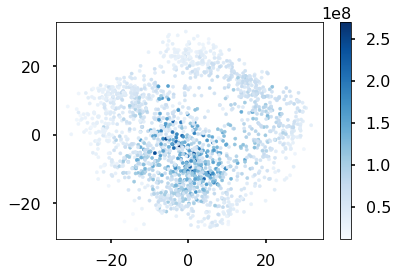

In [242]:
two_dim_label_viz(low_data, pca_point_strain)

In [270]:
mds_strain = strain(mds_diff_distances); mds_strain

1.0556964004328464

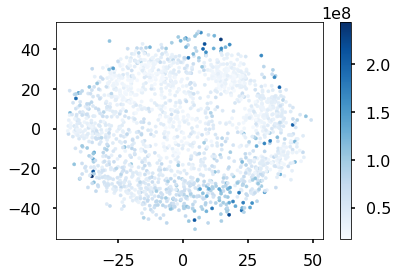

In [244]:
mds_point_strain = point_strain(mds_diff_distances)
two_dim_label_viz(mds_low_data, mds_point_strain)

In [245]:
## Hmmmm...now I want these to be on the same color bars

In [246]:
data = [low_data, mds_low_data]
labels = [pca_point_stress, mds_point_stress]
titles = ['PCA', 'MDS']

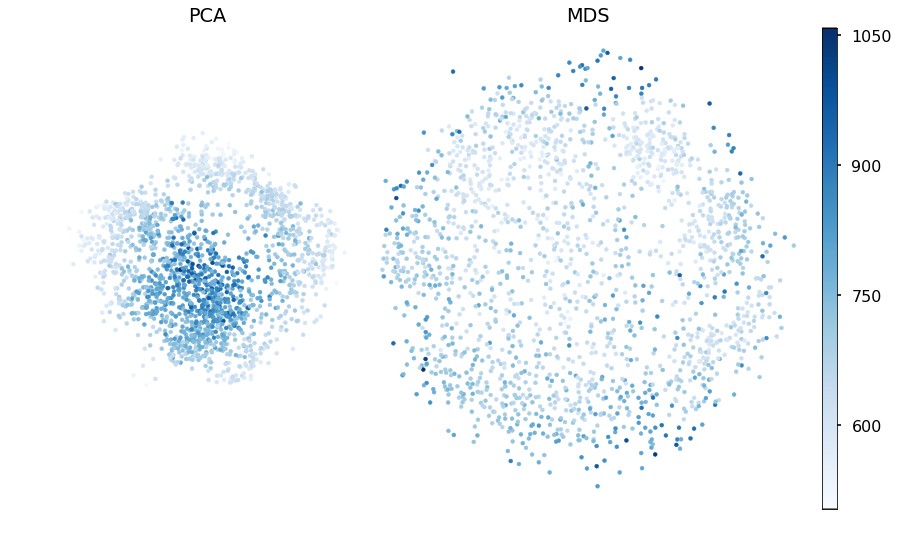

In [247]:
nrows = 1
ncols = 2
s = 15
cmap = "Blues"

fig = plt.figure(figsize=(14, 10))

grid = AxesGrid(fig, 111,
                nrows_ncols=(nrows, ncols),
                axes_pad=0.05,
                cbar_mode='single',
                cbar_location='right',
                cbar_pad=0.1
                )

for i, ax in enumerate(grid):
    ax.set_axis_off()
    im = ax.scatter(data[i][:,0], data[i][:,1], c=labels[i], cmap=cmap, s=s)
    ax.set_title(title[i])
    #im = ax.imshow(np.random.random((16,16)), vmin=0, vmax=1)

# when cbar_mode is 'single', for ax in grid, ax.cax = grid.cbar_axes[0]

cbar = ax.cax.colorbar(im)
cbar = grid.cbar_axes[0].colorbar(im)

#cbar.ax.set_yticks(np.arange(0, 1.1, 0.5))
#cbar.ax.set_yticklabels(['low', 'medium', 'high'])
plt.title("Point Stress")
plt.show()

In [284]:
def two_dim_multiplot(data, labels, titles, cmap="Blues", s=15, **kwargs):
    ncols = 2
    nrows = int(len(data)/ncols)
    
    fig = plt.figure(figsize=(14*nrows, 5*ncols))

    grid = AxesGrid(fig, 111,
                    nrows_ncols=(nrows, ncols),
                    axes_pad=0.05,
                    cbar_mode='single',
                    cbar_location='right',
                    cbar_pad=0.1
                    )

    for i, ax in enumerate(grid):
        ax.set_axis_off()
        im = ax.scatter(data[i][:,0], data[i][:,1], c=labels[i], cmap=cmap, s=s)
        ax.set_title(titles[i])

    # when cbar_mode is 'single', for ax in grid, ax.cax = grid.cbar_axes[0]

    cbar = ax.cax.colorbar(im)
    cbar = grid.cbar_axes[0].colorbar(im);


## Comparisons 

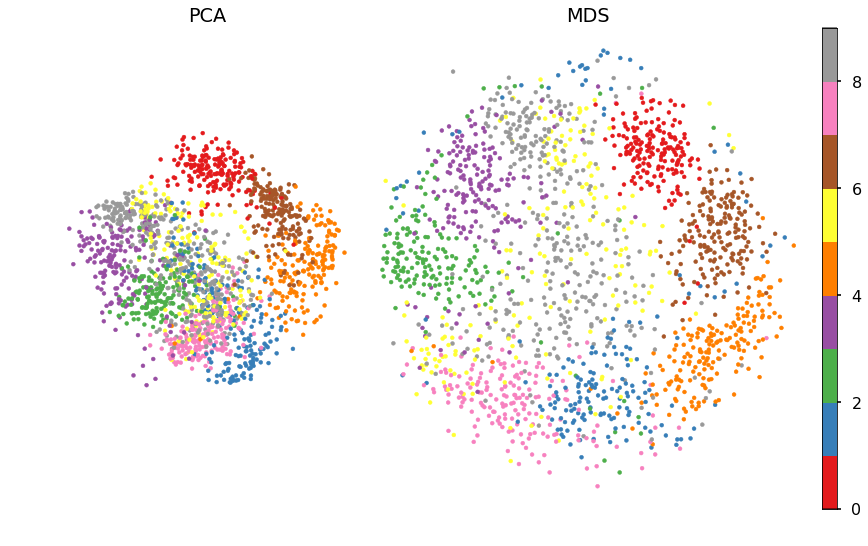

In [249]:
data = [low_data, mds_low_data]
labels = [low_labels, low_labels]
titles = ['PCA', 'MDS']

two_dim_multiplot(data, labels, titles, cmap="Set1")

### Stress (Metric MDS)

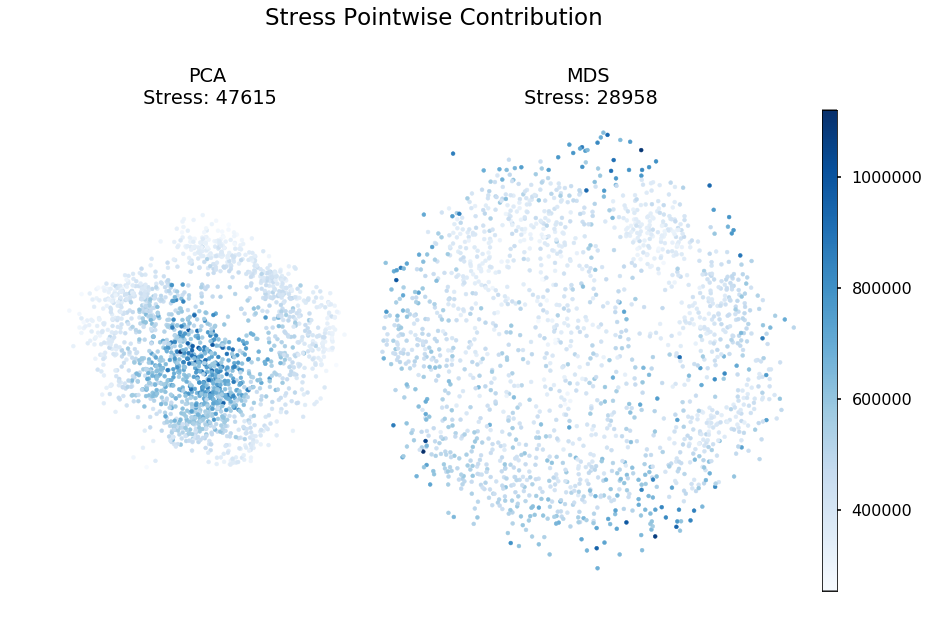

In [283]:
data = [low_data, mds_low_data]
labels = [pca_point_stress, mds_point_stress]
titles = [f'PCA\n Stress: {int(pca_stress)}', f'MDS\n Stress: {int(mds_stress)}']

two_dim_multiplot(data, labels, titles)
plt.suptitle("Stress Pointwise Contribution");

### Strain (Classical MDS/PCA)

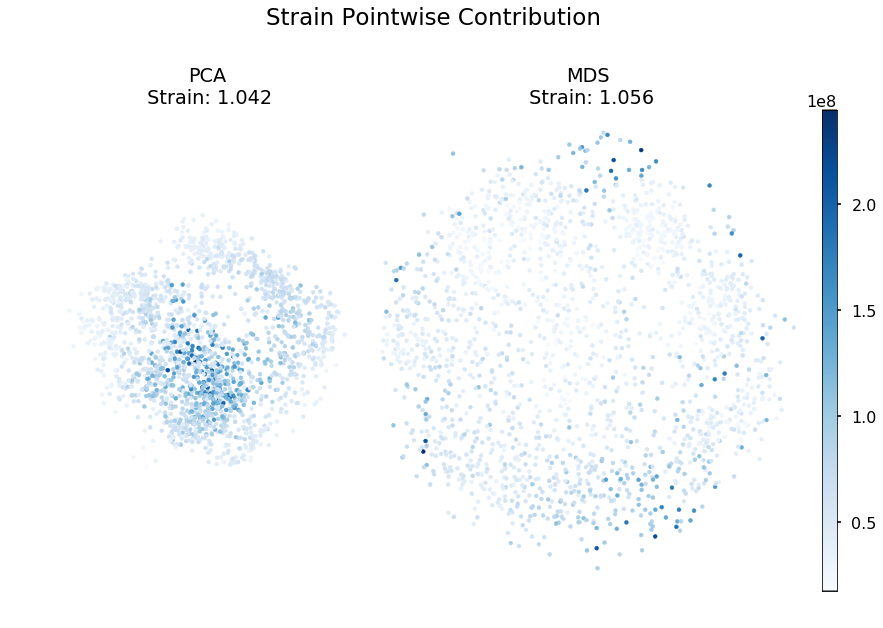

In [282]:
width = 4
precision = 4
data = [low_data, mds_low_data]
labels = [pca_point_strain, mds_point_strain]
titles = [f'PCA\n Strain: {pca_strain:{width}.{precision}}', f'MDS\n Strain: {mds_strain:{width}.{precision}}']

two_dim_multiplot(data, labels, titles)
plt.suptitle("Strain Pointwise Contribution");